In [1]:
import numpy as np
import pandas as pd

from scipy.stats import multivariate_normal
from sklearn.datasets import make_regression

import matplotlib.pyplot as plt

# Generic Dataset

## data1

In [2]:
random_seed=1000
sample_size=250

In [3]:
mean = np.array([14.7,200])
cov = np.array([[1, 0], [0, 80]])
distr = multivariate_normal(cov=cov, mean=mean, seed=random_seed)
data1 = distr.rvs(size=sample_size)

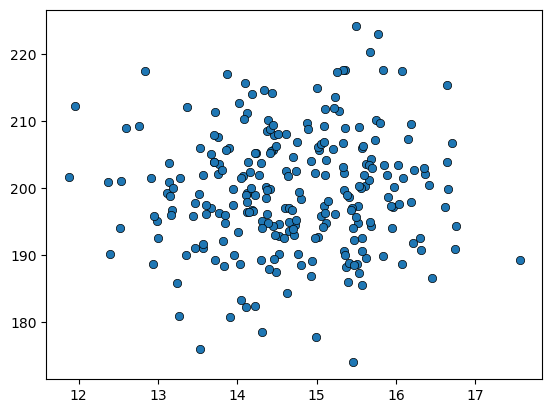

In [4]:
plt.plot(data1[:,0], data1[:,1], 'o', markeredgewidth=0.5, markeredgecolor='black');

## data2

In [5]:
mean = np.array([17,220])
cov = np.array([[2, 0], [0, 60]])
distr = multivariate_normal(cov=cov, mean=mean, seed=random_seed)
data2 = distr.rvs(size=sample_size)

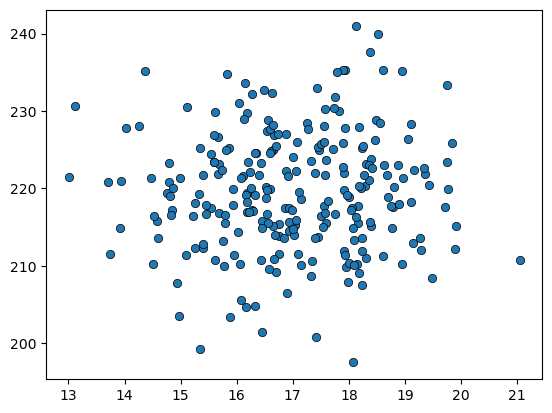

In [6]:
plt.plot(data2[:,0], data2[:,1], 'o', markeredgewidth=0.5, markeredgecolor='black');

## Both datasets

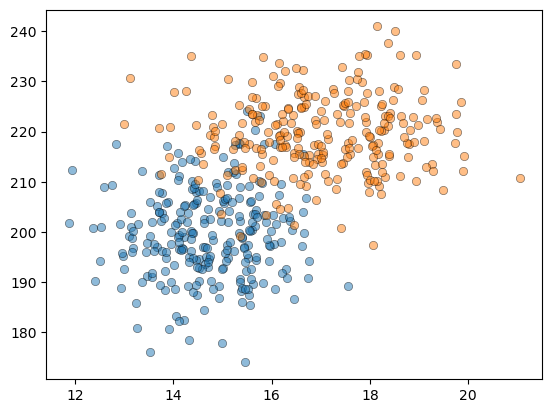

In [7]:
fig, ax = plt.subplots(1,1)
ax.plot(data1[:,0], data1[:,1], 'o', markeredgewidth=0.5, markeredgecolor='black', alpha=0.5)
ax.plot(data2[:,0], data2[:,1], 'o', markeredgewidth=0.5, markeredgecolor='black', alpha=0.5)
plt.savefig('../images/scatter_with_colors.png', bbox_inches='tight');

## Joining data

In [8]:
joined_x = np.append(data1[:,0], data2[:,0])
joined_y = np.append(data1[:,1], data2[:,1])
types = np.array(['yes'] * sample_size + ['no'] * sample_size)

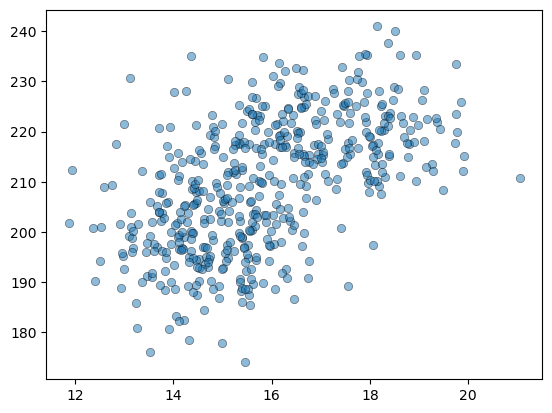

In [9]:
plt.plot(joined_x, joined_y, 'o', markeredgewidth=0.5, markeredgecolor='black', alpha=0.5)
plt.savefig("../images/scatter.png", bbox_inches='tight');

## exporting to csv

In [10]:
df = pd.DataFrame({'pressure (psi)':joined_x, 'temperature (deg F)':joined_y, 'failure':types})
df.to_csv("../data/toy_data.csv")

# Linear Regression Dataset (Housing Data)

In [11]:
sample_size=500
n_features=1
noise=30
random_state=42

In [12]:
regression_data = make_regression(n_samples=sample_size, 
                                  n_features=n_features, 
                                  noise=noise, 
                                  random_state=random_state)

In [13]:
x = 4*(regression_data[0].reshape(500))+15
y = regression_data[1]+255

## Exporting to CSV

In [14]:
df = pd.DataFrame({'sq_ft':x,
                    'price':y})
df.to_csv("../data/housing_data.csv")